# Dose Plots

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../src')
import raybay
from utils import par_names, get_dose_df, get_percent_diff

In [2]:
def get_goal_diff(row):
    return get_percent_diff(row, 'dose_val', 'goal_val')

full_df = pd.concat([get_dose_df(plan_type) for plan_type in ['clinical', 'random', 'bayes']])
full_df['plan_type'] = full_df.apply(lambda row: row['plan_type'] + '_full', axis=1)
full_df['goal_diff'] = full_df.apply(get_goal_diff, axis=1)

stop_df = pd.concat([get_dose_df(plan_type, stop=True) for plan_type in ['random', 'bayes']])
stop_df['plan_type'] = stop_df.apply(lambda row: row['plan_type'] + '_stop', axis=1)
stop_df['goal_diff'] = stop_df.apply(get_goal_diff, axis=1)

compare_df = pd.concat([full_df, stop_df])
compare_sub = compare_df[compare_df['plan_type'] != 'clinical_full']

dose_names = [par.replace('_', ' ') for par in par_names]

## With 100 Iterations

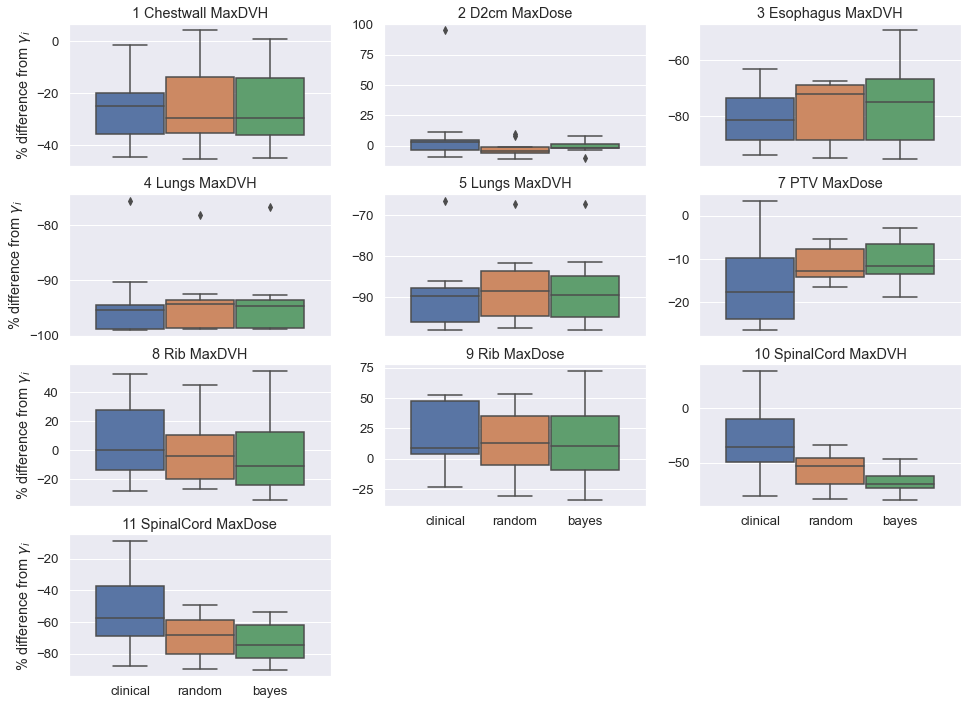

In [3]:
fig, ax = plt.subplots(4, 3, figsize=(16, 12))
for ii, par in enumerate(par_names):
    row, col = ii//3, np.mod(ii, 3)
    sns.boxplot(x='dose_name', y='goal_diff', hue='plan_type', 
                data=full_df[full_df['dose_name'] == par], ax=ax[row][col])
    ax[row][col].legend().set_visible(False)
    ax[row][col].set_xlabel('')
    ax[row][col].set_title(dose_names[ii])
    if (row == 3 and col == 0) or (row == 2 and col > 0):
        ax[row][col].set_xticks([-0.265, 0, 0.265])
        ax[row][col].set_xticklabels(['clinical', 'random', 'bayes'])
    else:
        ax[row][col].set_xticklabels([])
    if col == 0:
        ax[row][col].set_ylabel('% difference from $\gamma_i$')
    else:
        ax[row][col].set_ylabel('')
ax[3][1].set_visible(False)
ax[3][2].set_visible(False)

## With Stopping Conditions

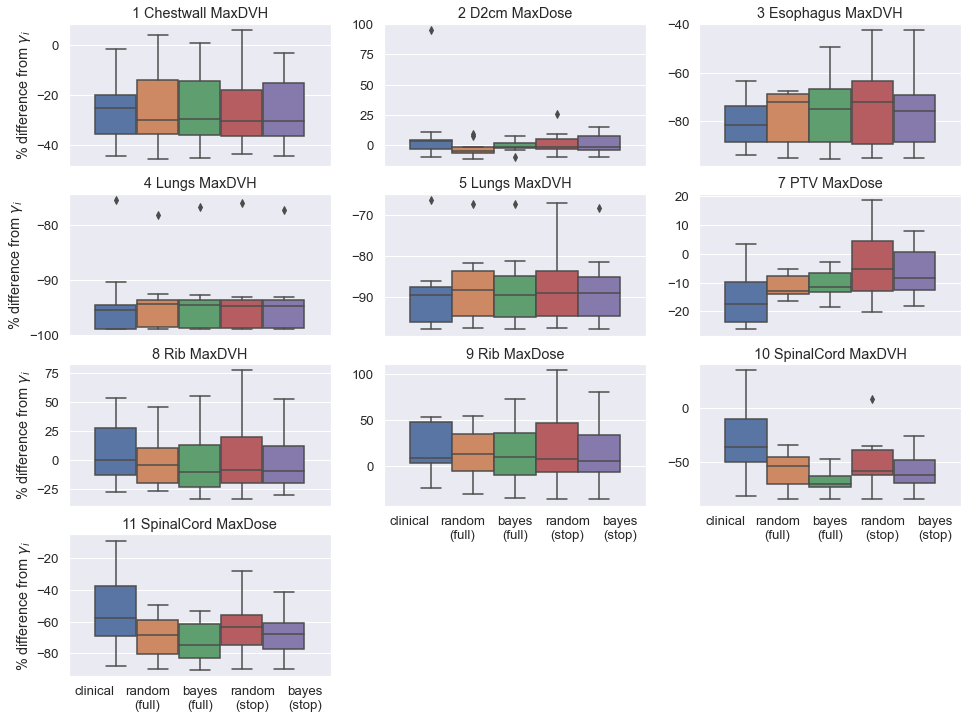

In [4]:
fig, ax = plt.subplots(4, 3, figsize=(16, 12))
for ii, par in enumerate(par_names):
    row, col = ii//3, np.mod(ii, 3)
    sns.boxplot(x='dose_name', y='goal_diff', hue='plan_type', 
                data=compare_df[compare_df['dose_name'] == par], ax=ax[row][col])
    ax[row][col].legend().set_visible(False)
    ax[row][col].set_xlabel('')
    ax[row][col].set_title(dose_names[ii])
    if (row == 3 and col == 0) or (row == 2 and col > 0):
        ax[row][col].set_xticks([-0.4, -0.2, 0,  0.2, 0.4])
        ax[row][col].set_xticklabels(['clinical', f"random\n(full)", f"bayes\n(full)",
                                      f"random\n(stop)", f"bayes\n(stop)"])
    else:
        ax[row][col].set_xticklabels([])
    if col == 0:
        ax[row][col].set_ylabel('% difference from $\gamma_i$')
    else:
        ax[row][col].set_ylabel('')
ax[3][1].set_visible(False)
ax[3][2].set_visible(False)

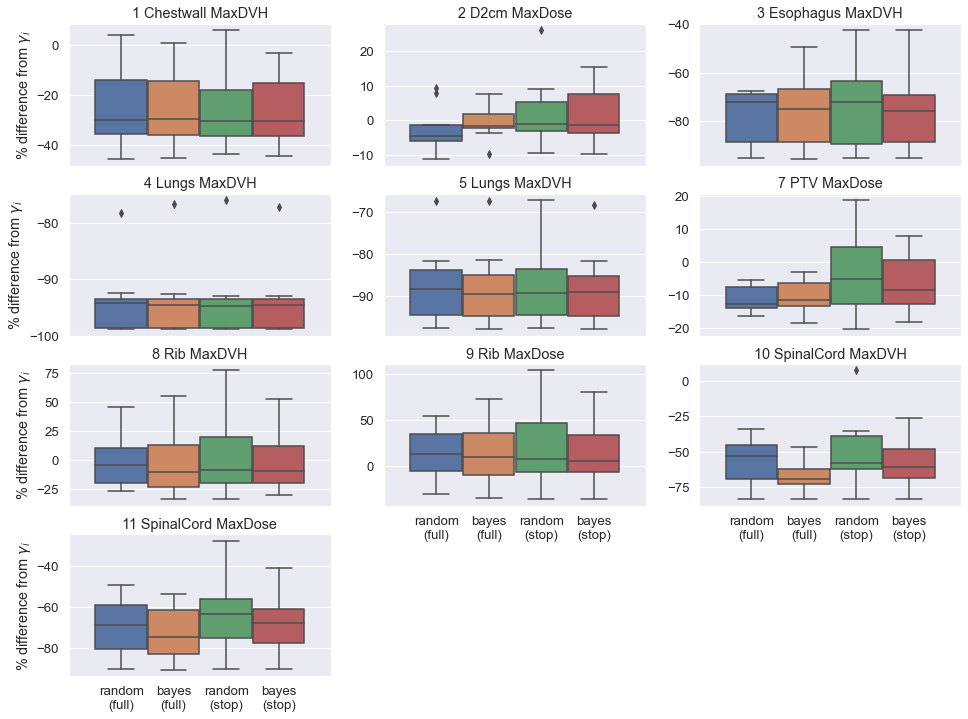

In [5]:
fig, ax = plt.subplots(4, 3, figsize=(16, 12))
for ii, par in enumerate(par_names):
    row, col = ii//3, np.mod(ii, 3)
    sns.boxplot(x='dose_name', y='goal_diff', hue='plan_type', 
                data=compare_sub[compare_sub['dose_name'] == par], ax=ax[row][col])
    ax[row][col].legend().set_visible(False)
    ax[row][col].set_xlabel('')
    ax[row][col].set_title(dose_names[ii])
    if (row == 3 and col == 0) or (row == 2 and col > 0):
        ax[row][col].set_xticks([-0.3, -0.1, 0.1, 0.3])
        ax[row][col].set_xticklabels([f"random\n(full)", f"bayes\n(full)",
                                      f"random\n(stop)", f"bayes\n(stop)"])
    else:
        ax[row][col].set_xticklabels([])
    if col == 0:
        ax[row][col].set_ylabel('% difference from $\gamma_i$')
    else:
        ax[row][col].set_ylabel('')
ax[3][1].set_visible(False)
ax[3][2].set_visible(False)